<span style="color:#2bb34f">
<span style="font-size:22px;">

#### AMAZON PRODUCTS SALES 

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The Amazon Dataset contains e-commerce data with features such as product ratings, reviews, prices, discounts, and sales performance. These variables play a crucial role in understanding consumer behavior and predicting product demand. In this project, various regression algorithms such as Linear Regression, Random Forest Regression, Support Vector Regression (SVR), and Decision Tree Regression are applied to predict the target variable, such as product sales or ratings, based on multiple influencing factors. The goal is to enable data-driven insights that help businesses optimize pricing strategies, improve product recommendations, and enhance overall marketplace performance through accurate predictive modeling.

## Introduction:

#### Import the necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

#### Import dataset

In [ ]:
df=pd.read_csv('Amazon_Dataset.csv')

#### Display few rows of dataset

In [31]:
df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


#### Data Cleaning

#### Checking any negative values in the dataset

In [32]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=["number"])

# Count negative values per column
negative_counts = (numeric_data <  0).sum()

# Total negatives in dataset
total_negatives = negative_counts.sum()

print("Negative values per column:\n", negative_counts)
print("\nTotal negative values in dataset:", total_negatives)

Negative values per column:
 product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
discount_percentage     0
dtype: int64

Total negative values in dataset: 0


In [33]:
#-----Check whether any null values-----
df.isnull().sum()

product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64

In [34]:
#-------Dropping null values in buy_box_availability-------
df=df.dropna(subset=['buy_box_availability','product_page_url'])


In [35]:
#------Fill product_rating using interpolate-----------
df['product_rating']=df['product_rating'].interpolate(method='linear')

#------Fill total_reviews using interpolate-----------
df['total_reviews']=df['total_reviews'].interpolate(method='linear')

#------Fill purchased_last_month using interpolate-----------
df['purchased_last_month']=df['purchased_last_month'].interpolate(method='linear')

#------Fill discounted_price using interpolate-----------
df['discounted_price']=df['discounted_price'].interpolate(method='linear')

#------Fill original_price using interpolate-----------
df['original_price']=df['original_price'].interpolate(method='linear')

#------Fill discount_percentage using interpolate-----------
df['discount_percentage']=df['discount_percentage'].interpolate(method='linear')

In [36]:
#--------Checking duplicate values-------------
df.duplicated().sum()

np.int64(0)

In [37]:
#----------Checking data types of columns---------
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26233 entries, 0 to 42674
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         26233 non-null  object 
 1   product_rating        26233 non-null  float64
 2   total_reviews         26233 non-null  float64
 3   purchased_last_month  26233 non-null  float64
 4   discounted_price      26233 non-null  float64
 5   original_price        26233 non-null  float64
 6   is_best_seller        26233 non-null  object 
 7   is_sponsored          26233 non-null  object 
 8   has_coupon            26233 non-null  object 
 9   buy_box_availability  26233 non-null  object 
 10  product_image_url     26233 non-null  object 
 11  product_page_url      26233 non-null  object 
 12  data_collected_at     26233 non-null  object 
 13  product_category      26233 non-null  object 
 14  discount_percentage   26233 non-null  float64
dtypes: float64(6), object(9)

<span style="color:#de4710">
<span style="font-size:26px;">
What are the products available?

In [38]:
data=df['product_category'].unique()
uni_df=pd.DataFrame(data,columns=['product_category'])
uni_df

,product_category
0,Phones
1,Laptops
2,Storage
3,Cameras
4,Printers & Scanners
5,Other Electronics
6,Chargers & Cables
7,TV & Display
8,Networking
9,Speakers


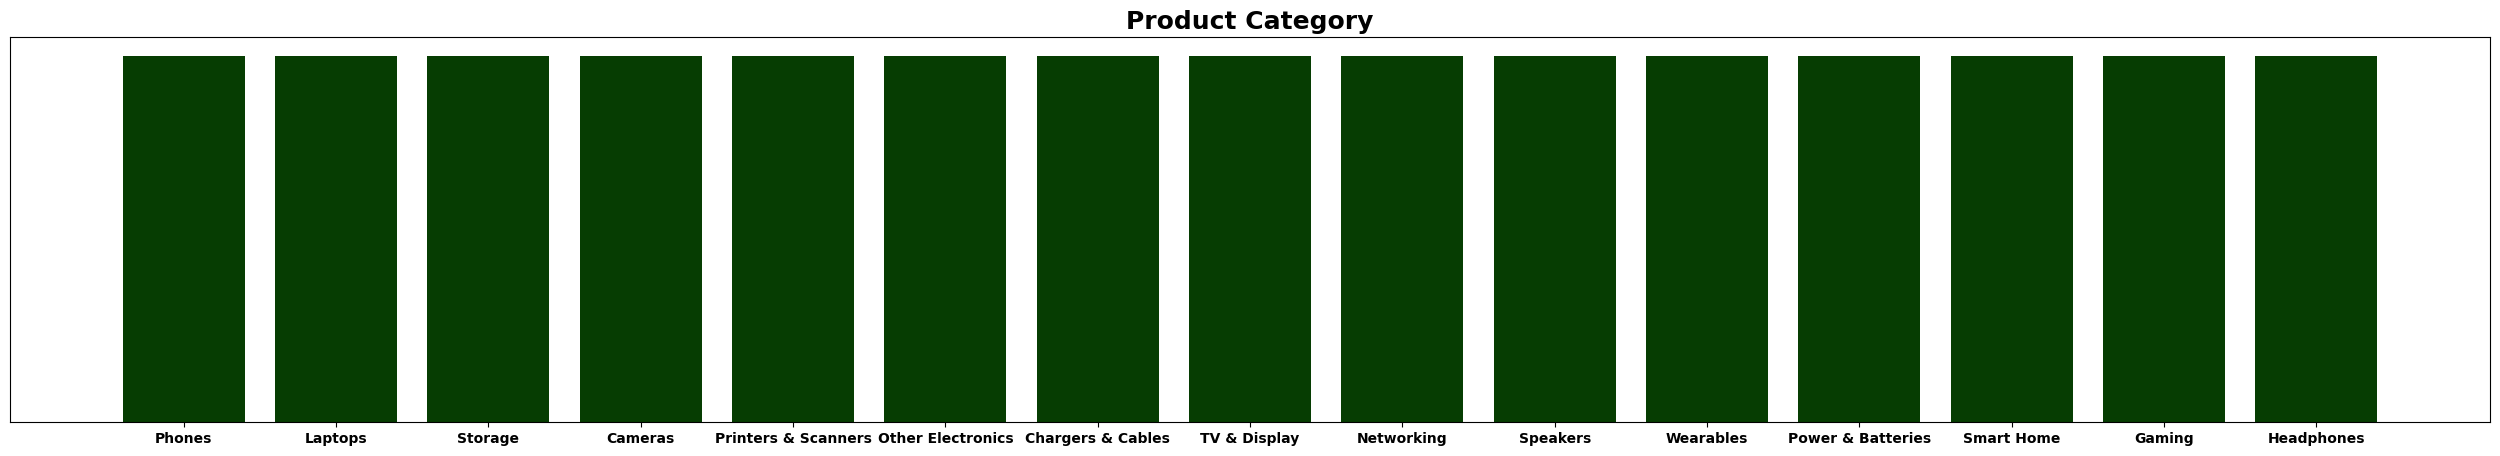

In [39]:
plt.figure(figsize=(32,5))
plt.bar(uni_df['product_category'], [1]*len(uni_df),color='#063d02')  # all bars same height
plt.xticks(rotation=0,fontweight='bold')
plt.yticks([])  # remove y-axis
plt.title("Product Category",fontsize=18,fontweight='bold')
plt.show()

<span style="color:#de4710">
<span style="font-size:26px;">
Which product category has the highest total sales?

In [40]:
# Calculate total sales (discounted_price × purchased_last_month)
df["total_sales"] = df["discounted_price"] * df["purchased_last_month"]

# Group by product category and sum total sales
category_sales = df.groupby("product_category", as_index=False)["total_sales"].sum()

# Sort by total sales (descending)
category_sales = category_sales.sort_values(by="total_sales", ascending=False)

# Find top category
top_category = category_sales.iloc[0]["product_category"]
top_sales = category_sales.iloc[0]["total_sales"]

print(f"Category with highest total sales: {top_category}")
print(f"Total Sales Value: ${top_sales:,.2f}")


Category with highest total sales: Laptops
Total Sales Value: $365,791,860.68


C:\Users\anusr\AppData\Local\Temp\ipykernel_40640\650057119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


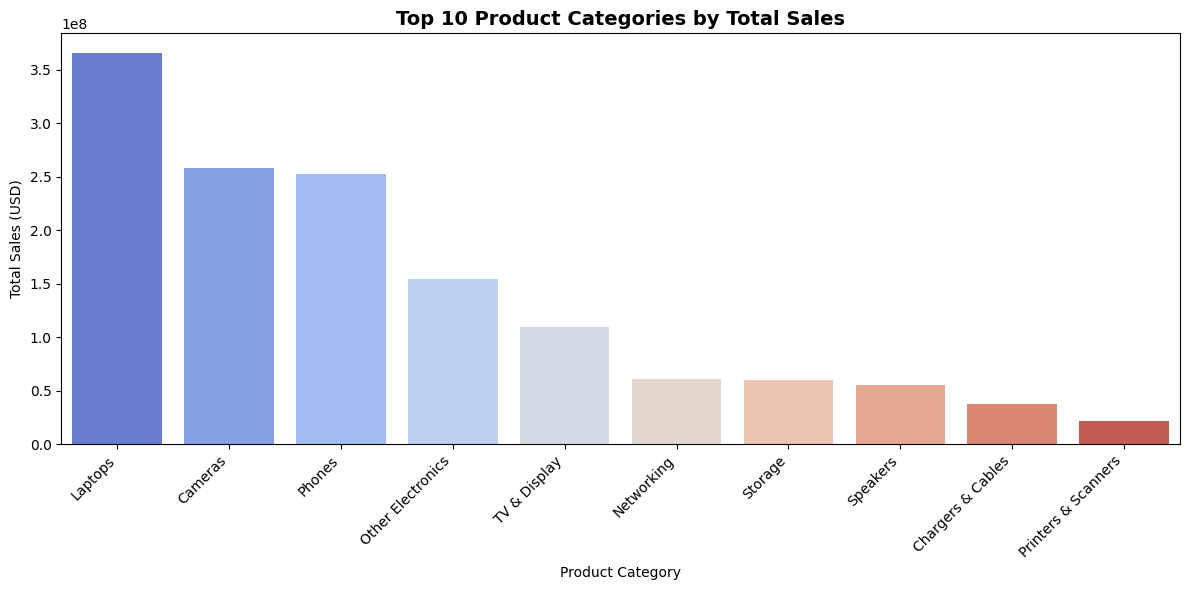

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_sales.head(10),
    x="product_category",
    y="total_sales",
    palette="coolwarm"
)
plt.title("Top 10 Product Categories by Total Sales", fontsize=14, weight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<span style="color:#de4710">
<span style="font-size:26px;">
Correlation Matrix

product_rating          0.047451
total_reviews           0.420849
purchased_last_month    1.000000
discounted_price       -0.067229
original_price         -0.067235
discount_percentage     0.062096
Name: purchased_last_month, dtype: float64


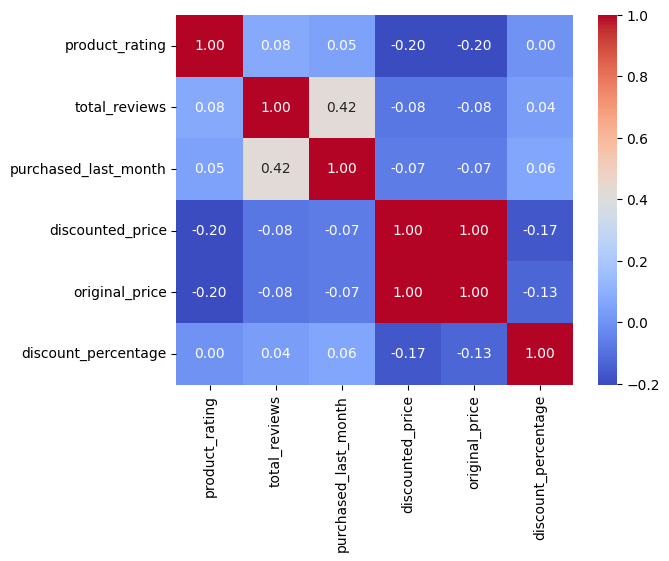

In [42]:
x=df.iloc[:,[1,2,3,4,5,14]]
corr_matrix=x.corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
cor=corr_matrix['purchased_last_month']
print(cor)

<span style="color:#de4710">
<span style="font-size:30px;">
 Model 1: Linear Regression

In [43]:
#----------------identifying predictor and target columns------------------
x=df.iloc[:,2].values.reshape(-1,1)
y=df.iloc[:,3].values

#----------------Splitting the variables into the test and training data set------------
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#---------------Loading Linear Regression Class----------------------
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

#---------------Fitting the simple LinearRegression model to the training dataset-----------
regressor.fit(x_train,y_train)

#----------------Prediction Result on Test data------------------
y_pred=regressor.predict(x_test)

#--------------Calculating mean of target variable---------------
avg_sales = df["purchased_last_month"].mean()
print("Average purchased_last_month:", avg_sales)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
linacc= r2_score(y_test, y_pred)
print("Accuracy :",linacc*100)

Average purchased_last_month: 523.912629131247
Mean Absolute Error: 482.5844100733893
Mean Squared Error: 4144524.6468745526
Root Mean Squared Error 2035.8105626198505
Accuracy : 8.189722060688332


<span style="color:#de4710">
<span style="font-size:30px;">
 Model 2: Multiple Linear Regression

In [44]:
#----------------identifying predictor and target columns------------------
x=df.iloc[:,[1,2,5,14,6,8]].values
y=df.iloc[:,3].values

#-----------------Converting Categorical columns into numerical format-----------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('is_best_seller', OneHotEncoder(),[4]),
        ('has_coupon', OneHotEncoder(),[5])
    ],
    remainder='passthrough'
)
x = ct.fit_transform(x)

#----------------Splitting the variables into the test and training data set------------
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#---------------Loading Linear Regression Class----------------------
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

#---------------Fitting the LinearRegression model to the training dataset----------
regressor.fit(x_train,y_train)

#----------------Prediction Result on Test data------------------
y_pred=regressor.predict(x_test)

#--------------Calculating mean of target variable---------------
avg_sales = df["purchased_last_month"].mean()
print("Average purchased_last_month:", avg_sales)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
mulacc= r2_score(y_test, y_pred)
print("Accuracy :", mulacc*100)

Average purchased_last_month: 523.912629131247
Mean Absolute Error: 471.5564053653993
Mean Squared Error: 3782714.7546458556
Root Mean Squared Error 1944.920243775013
Accuracy : 16.204601835081554


<span style="color:#de4710">
<span style="font-size:35px;">
NON-LINEAR ALGORITHM

<span style="color:#de4710">
<span style="font-size:30px;">
Model 3: Polynonial Regression

In [45]:
#----------------identifying predictor and target columns------------------
x=df.iloc[:,[1,2,5,14,6,8]].values
y=df.iloc[:,3].values

#-----------------Converting Categorical columns into numerical format-----------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('is_best_seller', OneHotEncoder(), [4]),
        ('has_coupon', OneHotEncoder(), [5])
    ],
    remainder='passthrough'
)
x = ct.fit_transform(x)

#----------------Splitting the variables into the test and training data set------------
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#---------------Loading PolynomialFeatures----------------------
from sklearn.preprocessing import PolynomialFeatures
poly_regs=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly_regs.fit_transform(x_train)
x_test_poly=poly_regs.transform(x_test)

model=LinearRegression()
model.fit(x_train_poly,y_train)

y_pred=model.predict(x_test_poly)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
polacc= r2_score(y_test, y_pred)
print("Accuracy :", polacc*100)

Mean Absolute Error: 508.44775050741487
Mean Squared Error: 4288862.995848388
Root Mean Squared Error 2070.95702414328
Accuracy : 4.992312208974081


<span style="color:#de4710">
<span style="font-size:30px;">
Model 4: Random Forest Regression

In [46]:
#----------------identifying predictor and target columns------------------
x = df.iloc[:,[1,2,5,14,6,8]].values
y=df.iloc[:,3].values

#-----------------Converting Categorical columns into numerical format-----------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('is_best_seller', OneHotEncoder(), [4]),
        ('has_coupon', OneHotEncoder(), [5])
    ],
    remainder='passthrough'
)
x = ct.fit_transform(x)

#----------------Splitting the variables into the test and training data set------------
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#-----------------Performing Standardization-----------------------------
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler(with_mean=False)
# Fit only on training set
x_train = st_x.fit_transform(x_train)
# Transform test set with same parameters
x_test = st_x.transform(x_test)

#-------------Loading RandomForestRegressor class---------------------
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

avg_sales = df["purchased_last_month"].mean()
print("Average purchased_last_month:", avg_sales)

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
ranacc= r2_score(y_test, y_pred)
print("Accuracy :", ranacc*100)

Average purchased_last_month: 523.912629131247
Mean Absolute Error: 295.56232149418395
Mean Squared Error: 3286671.3789022486
Root Mean Squared Error 1812.9179184128134
Accuracy : 27.193046609156855


<span style="color:#de4710">
<span style="font-size:30px;">
Model 5: Support Vector Regression

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# -------------------------
# 1. Select predictors & target
# -------------------------
X = df.iloc[:, [1, 2, 5, 14, 6, 8]].values
y = df.iloc[:, 3].values

# -------------------------
# 2. OneHotEncoding for categorical features
# -------------------------
ct = ColumnTransformer(
    transformers=[
        ('is_best_seller', OneHotEncoder(), [4]),
        ('has_coupon', OneHotEncoder(), [5])
    ],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# -------------------------
# 3. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# -------------------------
# 4. Feature Scaling
# -------------------------
sc_X = StandardScaler(with_mean=False)  # with_mean=False because X is sparse after OneHotEncoding
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # scale target
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1)).ravel()

# -------------------------
# 5. Train SVR
# -------------------------
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # rbf is most common kernel
svr.fit(X_train, y_train)

# -------------------------
# 6. Predictions
# -------------------------
y_pred_scaled = svr.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # inverse scaling

# -------------------------
# 7. Evaluation
# -------------------------

from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
supacc= r2_score(y_test, y_pred)
print("Accuracy :", supacc*100)


Mean Absolute Error: 390.1120321971966
Mean Squared Error: 3630081.557576464
Root Mean Squared Error 1905.277291518603
Accuracy : 19.585760698806542


<span style="color:#de4710">
<span style="font-size:30px;">
Model 6: Decision Tree Regression

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features (X) and target (y)
X = df.iloc[:, [1, 2, 5, 14, 6, 8]].values
y = df.iloc[:, 3].values
ct = ColumnTransformer(
    transformers=[
        ('is_best_seller', OneHotEncoder(), [4]),
        ('has_coupon', OneHotEncoder(), [5])
    ],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=5)  # you can tune max_depth
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
decacc= r2_score(y_test, y_pred)
print("Accuracy :", decacc*100)

Mean Absolute Error: 429.5557373239249
Mean Squared Error: 4724166.345497959
Root Mean Squared Error: 2173.514744716023
Accuracy : -4.650608252212929


<span style="color:#de4710">
<span style="font-size:30px;">
Model 7: K-Nearest Neighbours Regression

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features (X) and target (y)
X = df.iloc[:, [1,2,5,14,6,8]].values
y = df.iloc[:, 3].values
ct = ColumnTransformer(
    transformers=[
        ('is_best_seller', OneHotEncoder(), [4]),
        ('has_coupon', OneHotEncoder(), [5])
    ],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling (important for KNN!)
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train, y_train)

# ✅ Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
knnacc= r2_score(y_test, y_pred)
print("Accuracy :", knnacc*100)

Mean Absolute Error: 330.7512360333675
Mean Squared Error: 3855994.454494249
Root Mean Squared Error: 1963.6686213550006
Accuracy : 14.58129634564168


<span style="color:#de4710">
<span style="font-size:30px;">
Model Comparison

C:\Users\anusr\AppData\Local\Temp\ipykernel_40640\2287872377.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


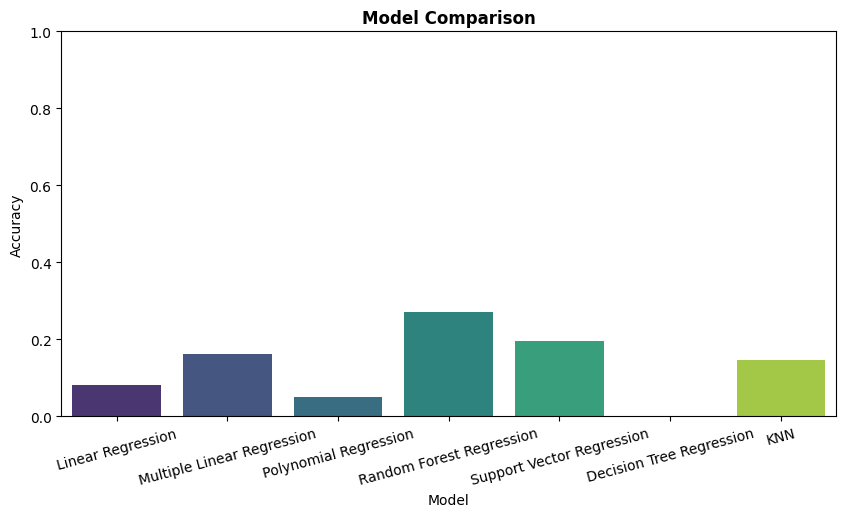

In [52]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Random Forest Regression','Support Vector Regression','Decision Tree Regression','KNN'],
    'Accuracy': [linacc,mulacc,polacc,ranacc,supacc,decacc,knnacc]
})

# Plot results
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison',fontweight='bold')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

<p style="text-align:justify;">
<span style="color:#cfad34">
<span style="font-size:26px;">
SUMMARY:
<p style="text-align:justify;">
<span style="color:#e65245">
<span style="font-size:22px;">
The bar chart illustrates the performance of various regression models based on their accuracy scores. Among all models tested, Random Forest Regression achieved the highest accuracy, indicating it performs best in predicting the target variable for this dataset. Support Vector Regression (SVR) and Multiple Linear Regression also showed moderate performance.
<p style="text-align:justify;">
<span style="color:#e65245">
<span style="font-size:22px;">
In contrast, models like Polynomial Regression and Linear Regression recorded relatively lower accuracies, suggesting they may not effectively capture the underlying relationships in the data. The K-Nearest Neighbors (KNN) and Decision Tree Regression models demonstrated average accuracy levels, implying that ensemble methods like Random Forest are better suited for this problem.
<p style="text-align:justify;">
<span style="color:#e65245">
<span style="font-size:22px;">
Overall, the comparison suggests that Random Forest Regression provides the most reliable results, likely due to its ability to handle non-linearity and complex interactions between features.